# Tarea 3 - Pregunta 1 - Small Circle inside Large Circle

---

# Matías Araya - 201173082-8
# Claudia Hazard - 201404523-9
---

## a)

In [49]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

In [50]:
X_train, Y_train, X_test, Y_test = do_circles()

In [51]:
import matplotlib.pyplot as plt
    
def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type,title):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.title(title, fontsize = 18)
    
    plt.show()

## b)

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

def create_ann_one(X_train,Y_train):
    params = ['sigmoid', 'relu', 'hard_sigmoid', 'tanh']
    models = []
    n_h=1
    
    for p in params:
        model = Sequential()
        model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
        model.add(Dense(n_h, kernel_initializer="uniform", activation=p))
        model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
        
        models.append(model)
        
    return models
    

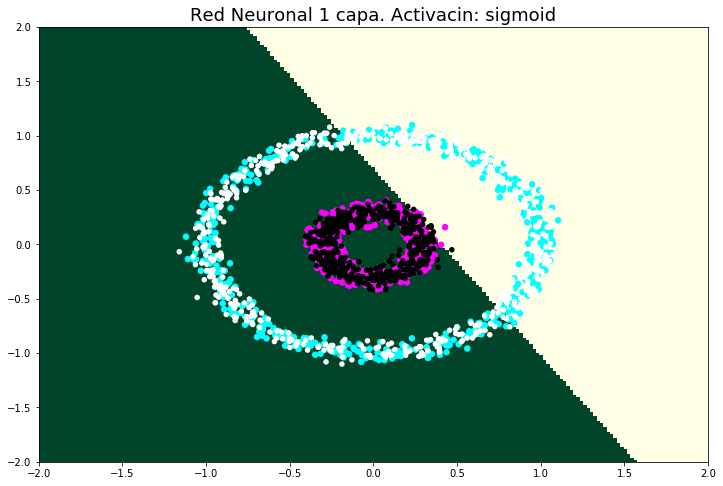

1000/1000 [==============================] - 0s 240us/step

Accuracy de Train: 0.698000
1000/1000 [==============================] - 0s 30us/step

Accuracy de Test: 0.669000
------------------------------------------------------------------------------------------


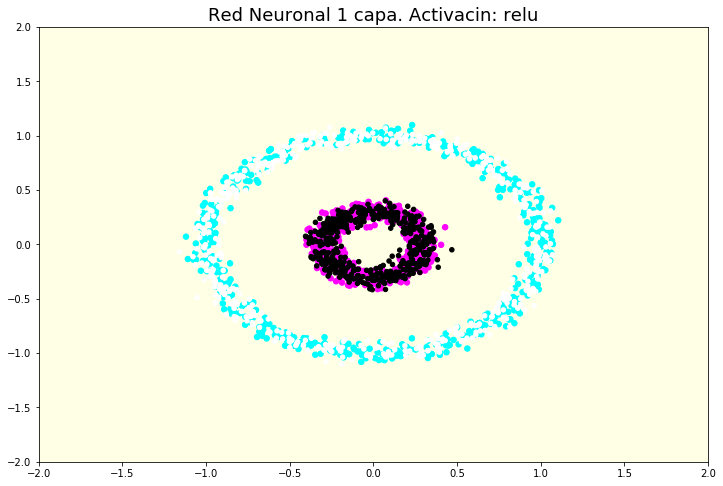

1000/1000 [==============================] - 0s 241us/step

Accuracy de Train: 0.493000
1000/1000 [==============================] - 0s 28us/step

Accuracy de Test: 0.507000
------------------------------------------------------------------------------------------


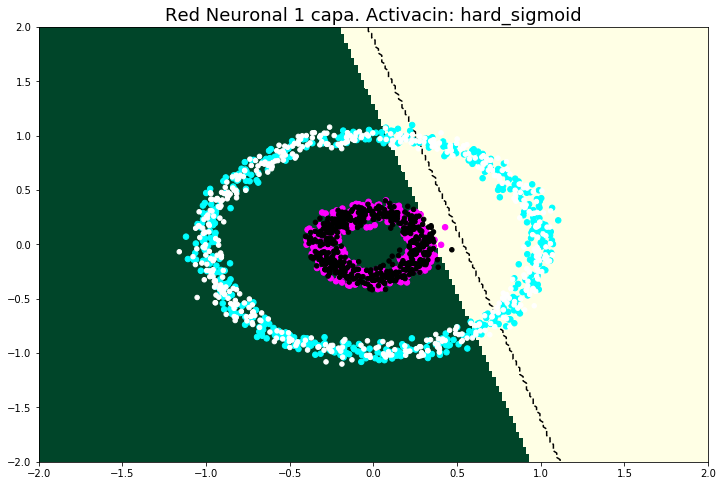

1000/1000 [==============================] - 0s 247us/step

Accuracy de Train: 0.705000
1000/1000 [==============================] - 0s 27us/step

Accuracy de Test: 0.670000
------------------------------------------------------------------------------------------


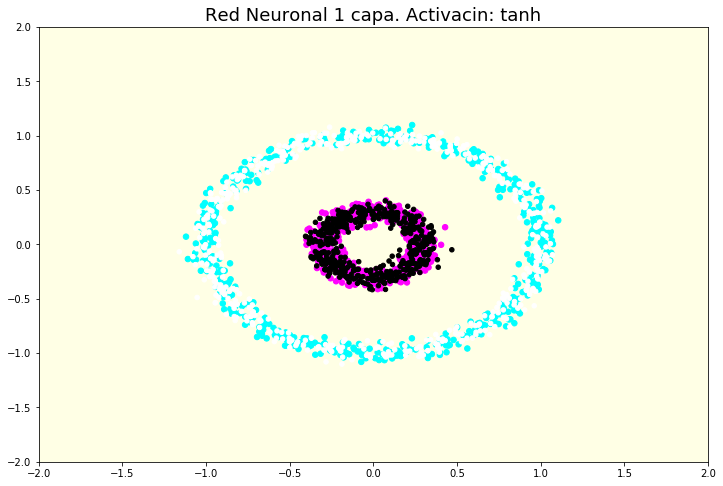

1000/1000 [==============================] - 0s 249us/step

Accuracy de Train: 0.507000
1000/1000 [==============================] - 0s 26us/step

Accuracy de Test: 0.493000
------------------------------------------------------------------------------------------


In [53]:
models = create_ann_one(X_train, Y_train)
params = ['sigmoid', 'relu', 'hard_sigmoid', 'tanh']
i = 0

for model in models:
    plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann', 'Red Neuronal 1 capa. Activacin: %s'%(params[i]))

    scores = model.evaluate(X_train, Y_train)
    train_acc = scores[1]
    print "\nAccuracy de Train: %f"%(train_acc)
    
    scores = model.evaluate(X_test, Y_test)
    test_acc = scores[1]
    print "\nAccuracy de Test: %f"%(test_acc)
    print "------------------------------------------------------------------------------------------"
    i += 1

Queda demostrado, dado los gráficos, que una red nueronal con solo una neurona no es capaz de clasificar correctamente los datos para este caso. Para las funciones de activación *relu* y *tanh* solo identifia una clase. Mientras que para las funciones de activaciones *sigmoid* y *hard_sigmoid* si es posible identificar dos clases, pero dada la configuración geométrica de los datos, donde no son linealmente separable, no lo hace de buena manera. Se tiene un accuracy aproximado para el conjunto de prueba de $0.67$ tanto para *sigmoid* como *hard_sigmoid*.

## c)

In [69]:
def create_ann(X_train, Y_train, X_test, Y_test):
    n_h = np.logspace(1, 5,base=2, num=5)    
    
    models = []
    acc_test = []
    acc_tr = []
    
    for n in n_h:
        n = int(n)
        model = Sequential()
        model.add(Dense(n, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
        model.add(Dense(1, kernel_initializer="uniform", activation='sigmoid'))
        model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
        
        scores = model.evaluate(X_train, Y_train)
        acc_tr.append(scores[1])
        
        scores = model.evaluate(X_test, Y_test)
        acc_test.append(scores[1])
        
        models.append(model)
        
        
    return models, acc_tr, acc_test    

2
1000/1000 [==============================] - 0s 28us/step
4
1000/1000 [==============================] - 0s 27us/step
8
1000/1000 [==============================] - 0s 30us/step
16
1000/1000 [==============================] - 0s 30us/step
32
1000/1000 [==============================] - 0s 29us/step

Mejor n_h: 4.0
Mejor Accuracy de Train: 1.000000
Mejor Accuracy de Test: 1.000000


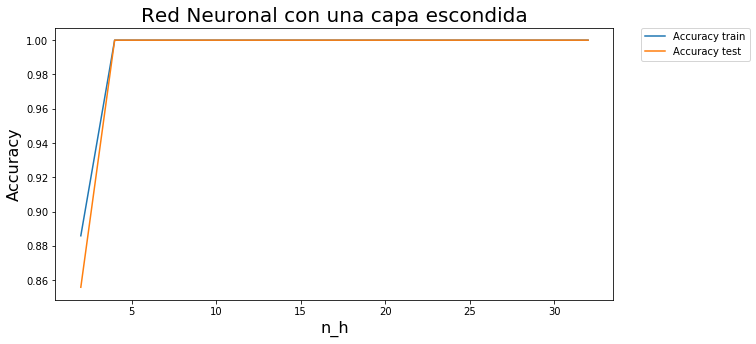

In [70]:
models, acc_tr, acc_test = create_ann(X_train, Y_train, X_test, Y_test)
n_h = np.logspace(1, 5,base=2, num=5)

best_index = acc_test.index(max(acc_test))
best_model = models[best_index]
        
n_h_best = n_h[best_index]
        
print "\nMejor n_h: %s"%(n_h_best)
print "Mejor Accuracy de Train: %f"%(acc_tr[best_index])
print "Mejor Accuracy de Test: %f"%(max(acc_test))


plt.figure(figsize=(10,5))
ax = plt.gca()
ax.plot(n_h,acc_tr,label='Accuracy train')
ax.plot(n_h,acc_test,label='Accuracy test')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('n_h', fontsize= 16)
plt.ylabel('Accuracy', fontsize= 16)
plt.title('Red Neuronal con una capa escondida', fontsize= 20)
ax.set_xscale('linear')
plt.show() 

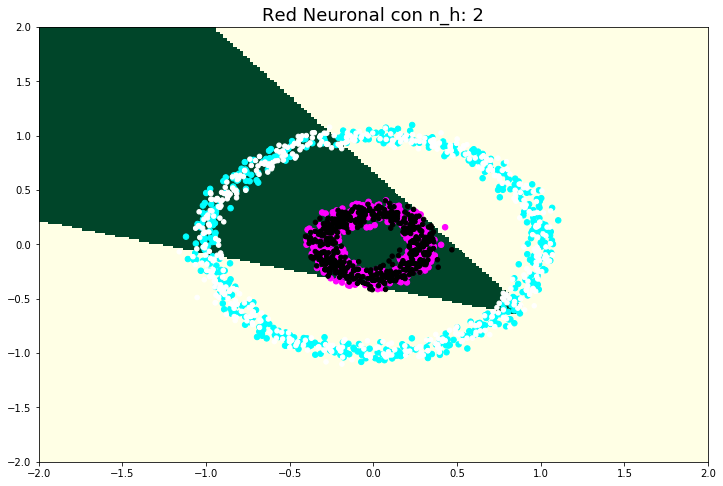

1000/1000 [==============================] - 0s 29us/step

Accuracy de Train: 0.886000
1000/1000 [==============================] - 0s 29us/step

Accuracy de Test: 0.856000
------------------------------------------------------------------------------------------


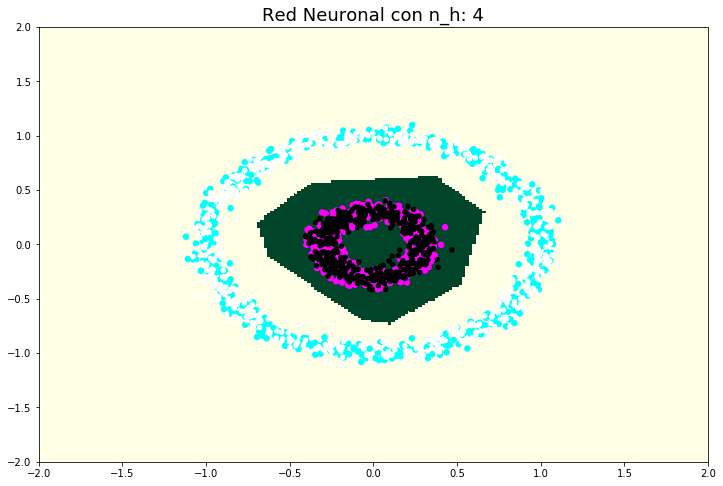

1000/1000 [==============================] - 0s 28us/step

Accuracy de Train: 1.000000
1000/1000 [==============================] - 0s 29us/step

Accuracy de Test: 1.000000
------------------------------------------------------------------------------------------


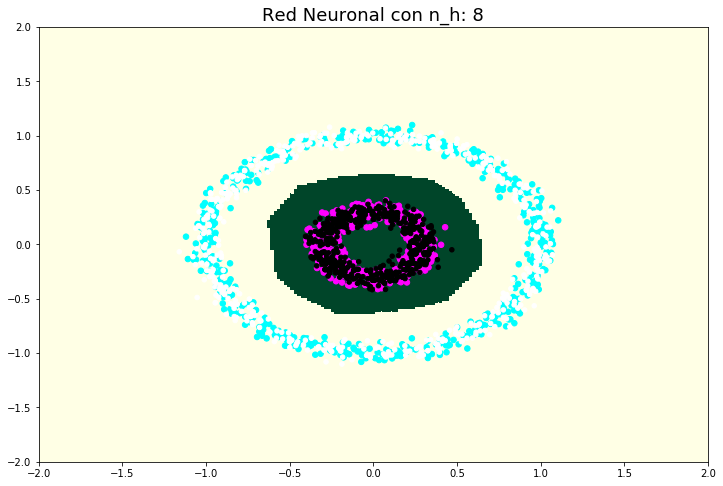

1000/1000 [==============================] - 0s 28us/step

Accuracy de Train: 1.000000
1000/1000 [==============================] - 0s 30us/step

Accuracy de Test: 1.000000
------------------------------------------------------------------------------------------


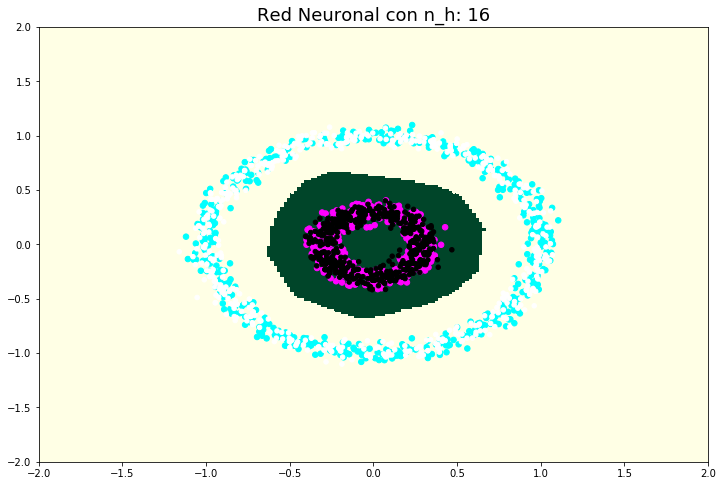

1000/1000 [==============================] - 0s 28us/step

Accuracy de Train: 1.000000
1000/1000 [==============================] - 0s 29us/step

Accuracy de Test: 1.000000
------------------------------------------------------------------------------------------


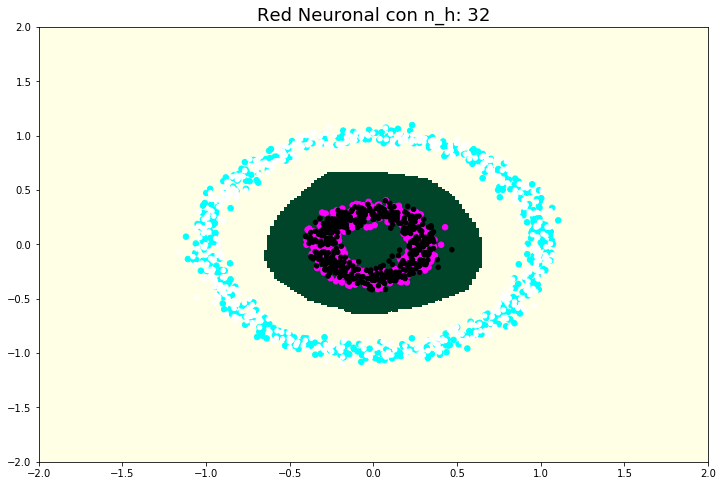

1000/1000 [==============================] - 0s 29us/step

Accuracy de Train: 1.000000
1000/1000 [==============================] - 0s 28us/step

Accuracy de Test: 1.000000
------------------------------------------------------------------------------------------


In [73]:
n_h = np.logspace(1, 5,base=2, num=5)
for i,(model) in enumerate(models):
    plot_classifier(model,X_train,Y_train, X_test, Y_test, 'ann', 'Red Neuronal con n_h: %d'%(n_h[i]))
    scores = model.evaluate(X_train, Y_train)
    acc_train = scores[1]
    print "\nAccuracy de Train: %f"%(acc_train)
    
    scores = model.evaluate(X_test, Y_test)
    acc_test = scores[1]
    print "\nAccuracy de Test: %f"%(acc_test)
    print "------------------------------------------------------------------------------------------"